In [137]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [138]:
df = pd.read_csv("Fraud_detection.csv")

In [139]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [140]:
df.shape

(1000, 40)

In [141]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

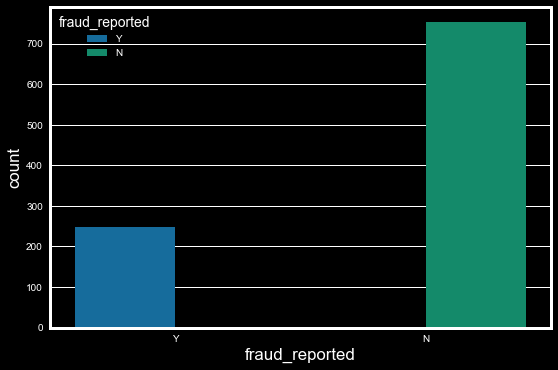

In [142]:
plt.style.use(['dark_background','seaborn-colorblind'])
ax = sb.countplot(x='fraud_reported', data=df, hue='fraud_reported')

From the above graph we can say that percentage of N is more than Y and variable is skewed

In [143]:
df['fraud_reported'].value_counts() # Count number of Y and N 

N    753
Y    247
Name: fraud_reported, dtype: int64

In [144]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

from above counts we can say that This dataset only has information from the USA

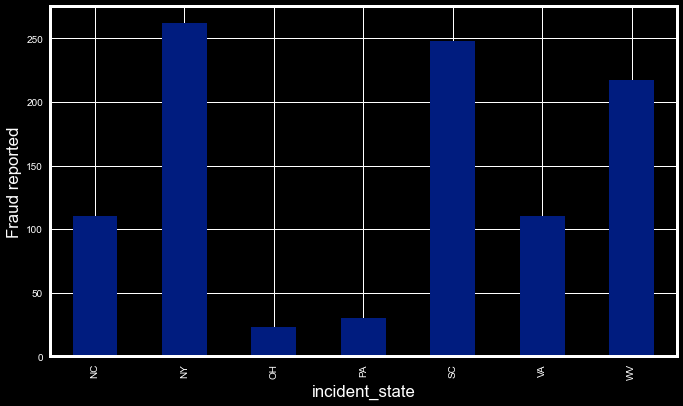

In [145]:
plt.style.use('seaborn-dark-palette')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

From the above we can see location wise fraud reported count

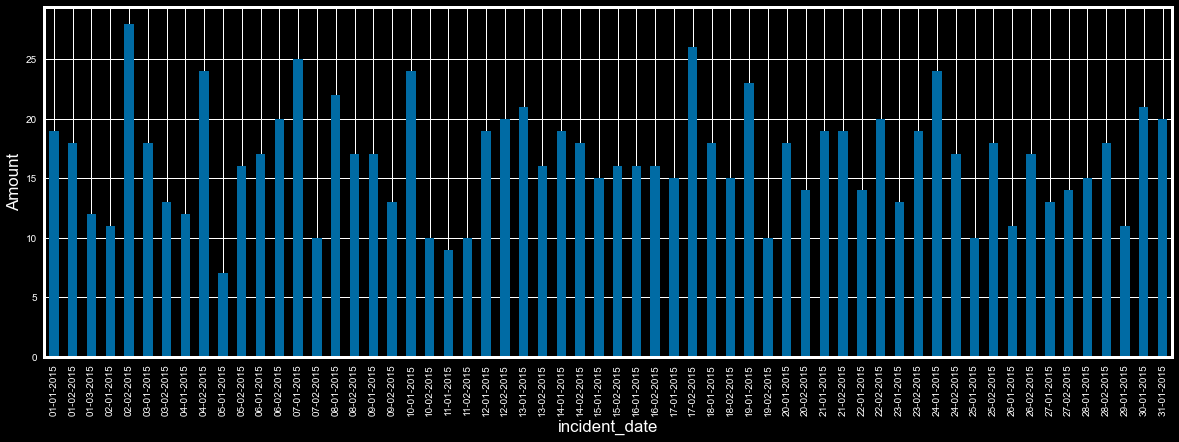

In [146]:
plt.style.use('tableau-colorblind10')
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Amount')
plt.show()

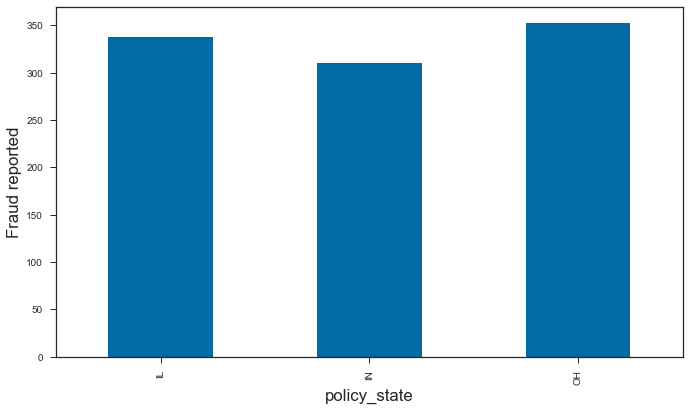

In [147]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

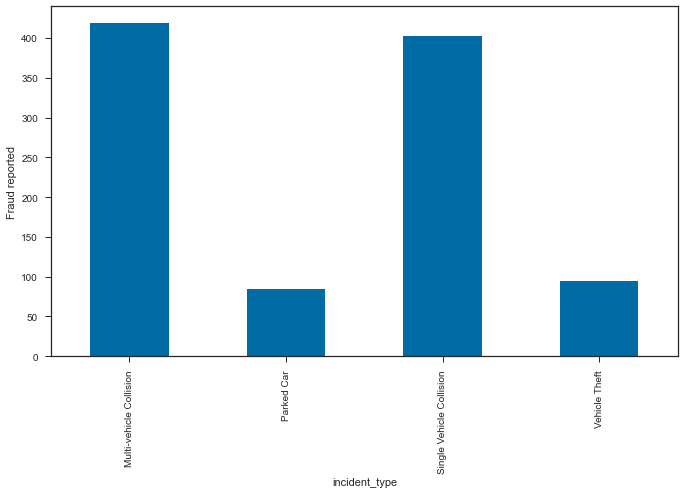

In [148]:
plt.style.use('seaborn-notebook')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

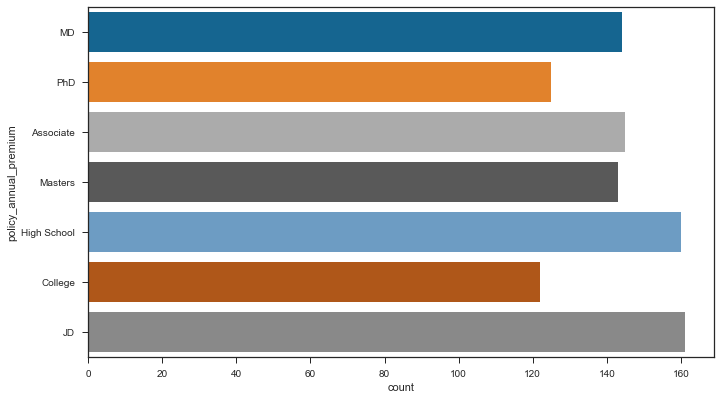

In [149]:
plt.style.use('seaborn-notebook')
fig = plt.figure(figsize=(10,6))
ax = sb.countplot(y = 'insured_education_level', data=df) 
ax.set_ylabel('policy_annual_premium')
plt.show()

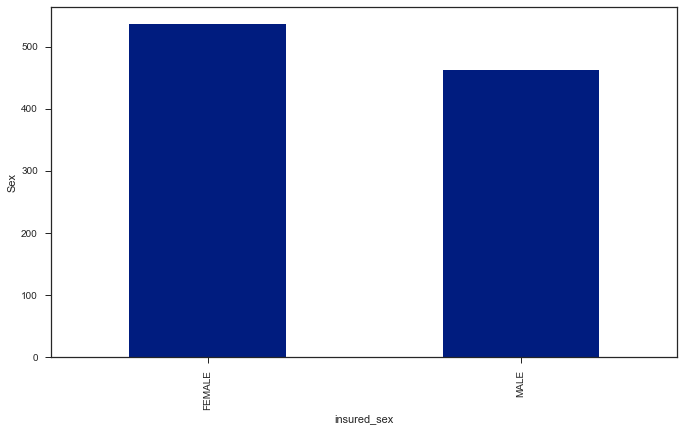

In [150]:
plt.style.use('seaborn-dark-palette')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('insured_sex').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Sex')
plt.show()

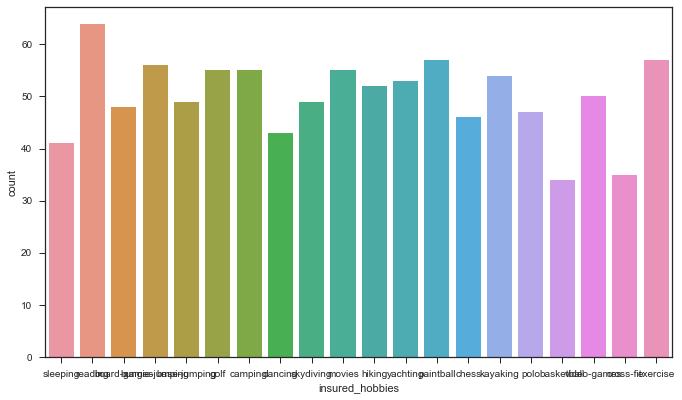

In [151]:
plt.style.use('seaborn-dark-palette')
fig = plt.figure(figsize=(10,6))
ax = sb.countplot(x='insured_hobbies', data=df)
plt.show()

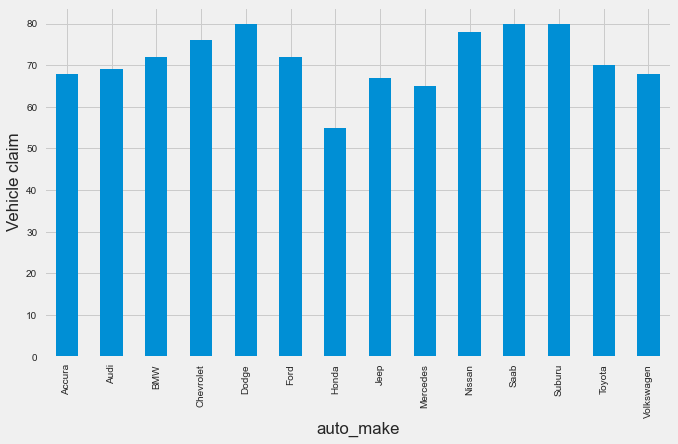

In [152]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
plt.show()

Data Processing

In [153]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              1  NaN  
1              1  NaN  
2              0  NaN  
3              1  NaN  
4              0  NaN  

[5 rows x 40 columns]

In [154]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  fraud_reported  _c39  
count     1000.000000    1000.000000  1000.000000     1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000        0.247000   NaN  
std       4824.726179   18886.252893     6.015861        0.431483   NaN  
min          0.000000      70.000000  1995.000000        0.000000   NaN  
25%       4445.000000   30292.500000  2000.000000        0.000000   NaN  
50%       6750.000000   42100.000000  2005.000000        0.000000   NaN  
75%      10885.000000   50822.500000  2010.000000        0.000000   NaN  
max      23670.000000   79560.000000  2015.000000        1.000000   NaN

In [155]:
df['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [156]:
df.policy_csl.head()

0     250/500
1     250/500
2     100/300
3     250/500
4    500/1000
Name: policy_csl, dtype: object

I will make 2 seprate column for policy_cls 

In [157]:
df['csl_poly1'] = df.policy_csl.str.split('/', expand=True)[0]
df['csl_poly2'] = df.policy_csl.str.split('/', expand=True)[1]

In [158]:
print(df['csl_poly1'].head())
print(df['csl_poly2'].head())

0    250
1    250
2    100
3    250
4    500
Name: csl_poly1, dtype: object
0     500
1     500
2     300
3     500
4    1000
Name: csl_poly2, dtype: object


In [159]:
df.auto_year.value_counts()

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [160]:
# Check on categorical variables:
df.select_dtypes(include=['object']).columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'csl_poly1', 'csl_poly2'],
      dtype='object')

In [161]:
# In the dataset we have some values likre ? now we will identify variables with '?' values
abc = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "?")
        abc[i] = j
abc = pd.DataFrame.from_dict(abc, orient = 'index')
print(abc)

                           0
policy_bind_date           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_date              0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
incident_location          0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
csl_poly1                  0
csl_poly2                  0


there are 3 columns which are contain question mark so we will focus on these 3 columns

In [162]:
df.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [163]:
df.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [164]:
df.police_report_available.value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [165]:
from sklearn.preprocessing import LabelEncoder

In [166]:
le = LabelEncoder()

In [167]:
df['collision_type']= le.fit_transform(df['collision_type'])
print(df['collision_type'].head())  
df['collision_type'].unique()

0    3
1    0
2    2
3    1
4    0
Name: collision_type, dtype: int32


array([3, 0, 2, 1])

In [168]:
df['property_damage']= le.fit_transform(df['property_damage'])
print(df['property_damage'].head())  
df['property_damage'].unique()

0    2
1    0
2    1
3    0
4    1
Name: property_damage, dtype: int32


array([2, 0, 1])

In [169]:
df['police_report_available']= le.fit_transform(df['police_report_available'])
print(df['police_report_available'].head())  
df['police_report_available'].unique()

0    2
1    0
2    1
3    1
4    1
Name: police_report_available, dtype: int32


array([2, 0, 1])

In [170]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... injury_claim property_claim vehicle_claim  auto_make  \
0       466132  ...         6510          13020         52080       Saab   
1       468176  ...          780            780          3510   Mercedes   
2       430632  ...         7700           3850         23100      Dodge   
3       608117  ...         6340           6340         50720  Chevrolet   
4       610706  ...         1300            650          4550     Accura   

  auto_model  auto_year  fraud_reported _c39 csl_poly1  csl_poly2  
0        92x       2004               1  NaN       250        500  
1       E400       2007               1  NaN       250        500  
2        RAM       2007               0  NaN       100        300  
3      Tahoe       2014               1  NaN       250        500  
4        RSX       2009               0  NaN       500       1000  

[5 rows x 42 columns]

In [171]:
df['auto_year'].value_counts()

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [172]:
df['auto_year']= le.fit_transform(df['auto_year'])
print(df['auto_year'].head())  
df['auto_year'].unique()

0     9
1    12
2    12
3    19
4    14
Name: auto_year, dtype: int64


array([ 9, 12, 19, 14,  8, 17, 20,  1,  7, 11,  5, 15,  4, 16, 10, 13,  0,
        6,  3,  2, 18], dtype=int64)

In [173]:
df['auto_year'].value_counts()

0     56
4     55
10    54
16    53
11    53
12    52
8     51
15    50
14    50
18    49
7     49
20    47
2     46
17    46
13    45
19    44
6     42
5     42
3     40
9     39
1     37
Name: auto_year, dtype: int64

In [174]:
df['incident_hour_of_the_day']= le.fit_transform(df['incident_hour_of_the_day'])
print(df['incident_hour_of_the_day'].head())  
df['incident_hour_of_the_day'].unique()

0     5
1     8
2     7
3     5
4    20
Name: incident_hour_of_the_day, dtype: int64


array([ 5,  8,  7, 20, 19,  0, 23, 21, 14, 22,  9, 12, 15,  6, 16,  4, 10,
        1, 17,  3, 11, 13, 18,  2], dtype=int64)

In [175]:
# dropping unimportant columns

df = df.drop(columns = [
    'policy_number', 
    'policy_csl',
    'policy_bind_date', 
    'incident_date', 
    'incident_location', 
    '_c39'])

df.head()

months_as_customer  age policy_state  policy_deductable  \
0                 328   48           OH               1000   
1                 228   42           IN               2000   
2                 134   29           OH               2000   
3                 256   41           IL               2000   
4                 228   44           IL               1000   

   policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                1406.91               0       466132        MALE   
1                1197.22         5000000       468176        MALE   
2                1413.14         5000000       430632      FEMALE   
3                1415.74         6000000       608117      FEMALE   
4                1583.91         6000000       610706        MALE   

  insured_education_level insured_occupation  ... total_claim_amount  \
0                      MD       craft-repair  ...              71610   
1                      MD  machine-op-inspct  ...               5070   
2                     PhD              sales  ...              34650   
3                     PhD       armed-forces  ...              63400   
4               Associate              sales  ...               6500   

  injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0         6510           13020          52080       Saab         92x   
1          780             780           3510   Mercedes        E400   
2         7700            3850          23100      Dodge         RAM   
3         6340            6340          50720  Chevrolet       Tahoe   
4         1300             650           4550     Accura         RSX   

  auto_year fraud_reported csl_poly1 csl_poly2  
0         9              1       250       500  
1        12              1       250       500  
2        12              0       100       300  
3        19              1       250       500  
4        14              0       500      1000  

[5 rows x 36 columns]

In [176]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                   int32
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available  

In [177]:
df._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'collision_type',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_year', 'fraud_reported'],
      dtype='object')

Applying encoding to convert all categorical variables except out target variables

In [178]:
df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'auto_make', 'auto_model',
       'csl_poly1', 'csl_poly2'],
      dtype='object')

In [179]:
from sklearn.preprocessing import OrdinalEncoder

In [180]:
oe = OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes == "object":
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
        
df.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48           2.0               1000   
1                 228   42           1.0               2000   
2                 134   29           2.0               2000   
3                 256   41           0.0               2000   
4                 228   44           0.0               1000   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1406.91               0       466132          1.0   
1                1197.22         5000000       468176          1.0   
2                1413.14         5000000       430632          0.0   
3                1415.74         6000000       608117          0.0   
4                1583.91         6000000       610706          1.0   

   insured_education_level  insured_occupation  ...  total_claim_amount  \
0                      4.0                 2.0  ...               71610   
1                      4.0                 6.0  ...                5070   
2                      6.0                11.0  ...               34650   
3                      6.0                 1.0  ...               63400   
4                      0.0                11.0  ...                6500   

   injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0          6510           13020          52080       10.0         1.0   
1           780             780           3510        8.0        12.0   
2          7700            3850          23100        4.0        30.0   
3          6340            6340          50720        3.0        34.0   
4          1300             650           4550        0.0        31.0   

   auto_year  fraud_reported  csl_poly1  csl_poly2  
0          9               1        1.0        2.0  
1         12               1        1.0        2.0  
2         12               0        0.0        1.0  
3         19               1        1.0        2.0  
4         14               0        2.0        0.0  

[5 rows x 36 columns]

In [182]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                   float64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                    float64
insured_education_level        float64
insured_occupation             float64
insured_hobbies                float64
insured_relationship           float64
capital-gains                    int64
capital-loss                     int64
incident_type                  float64
collision_type                   int32
incident_severity              float64
authorities_contacted          float64
incident_state                 float64
incident_city                  float64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available  

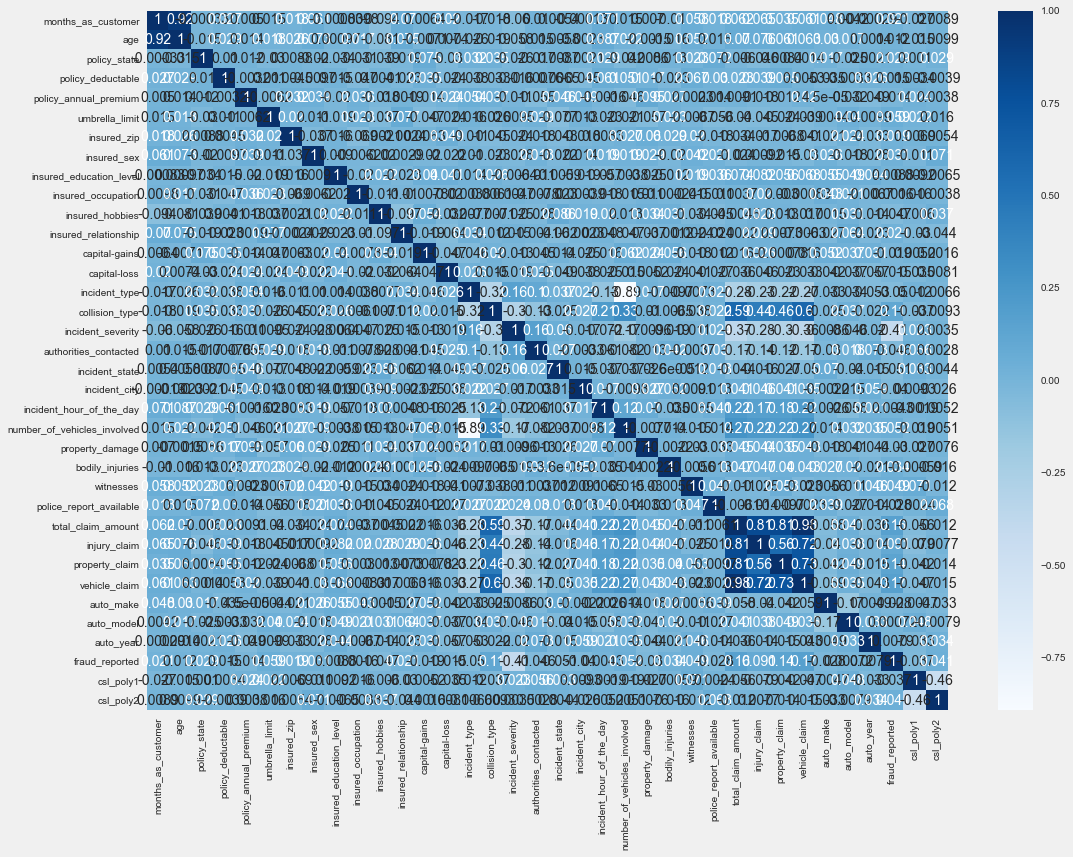

In [186]:
fig=plt.figure(figsize=(16,12))
hc=df.corr(method='pearson')
sb.heatmap(hc,annot=True,cmap="Blues")

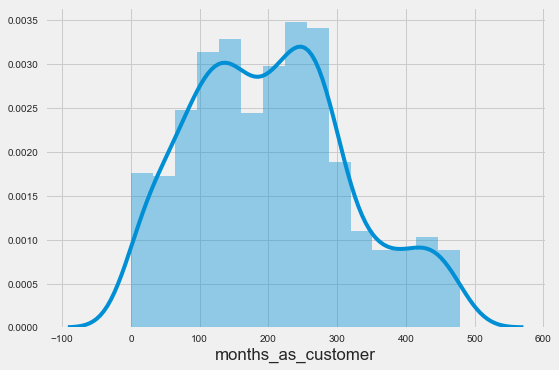

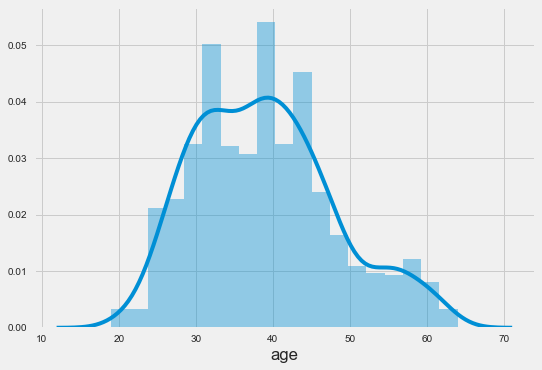

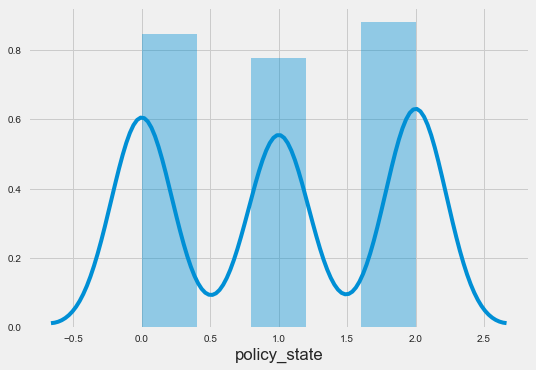

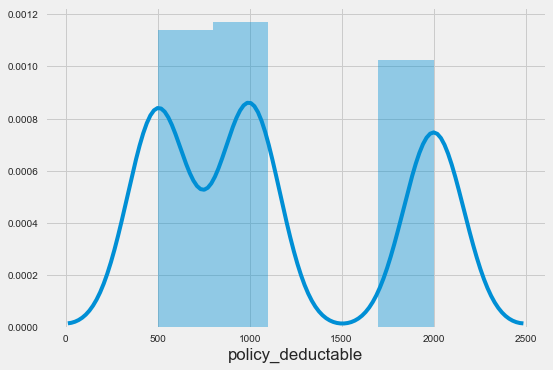

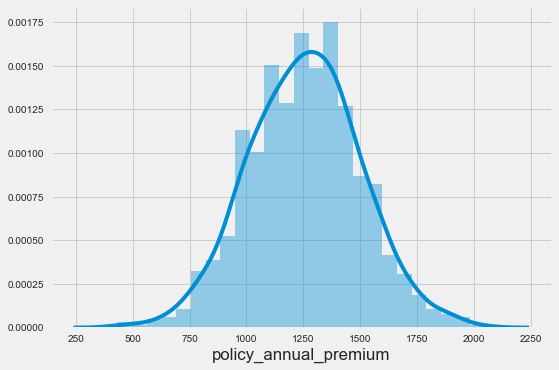

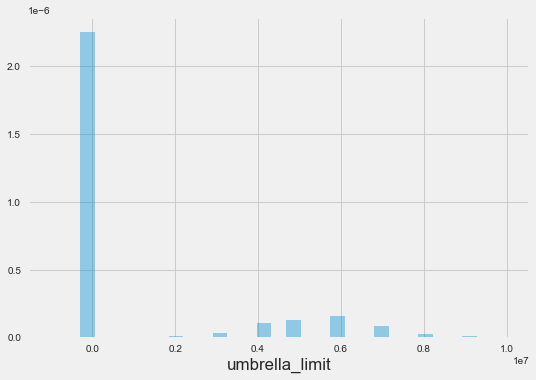

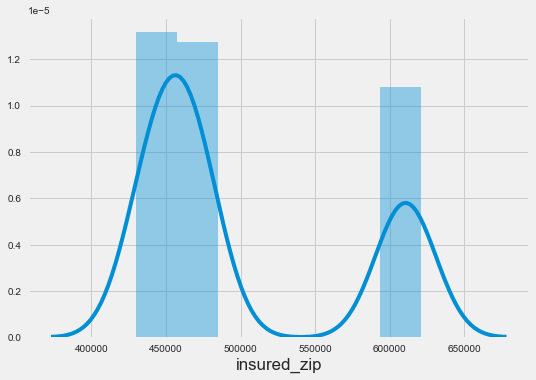

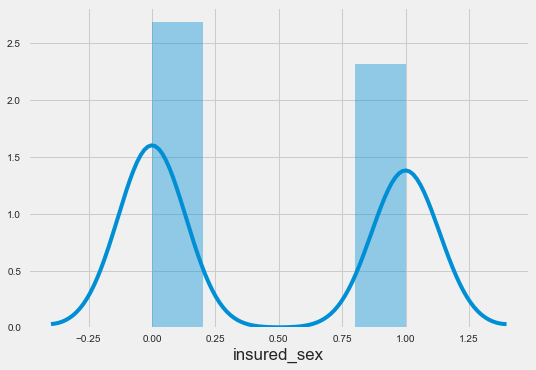

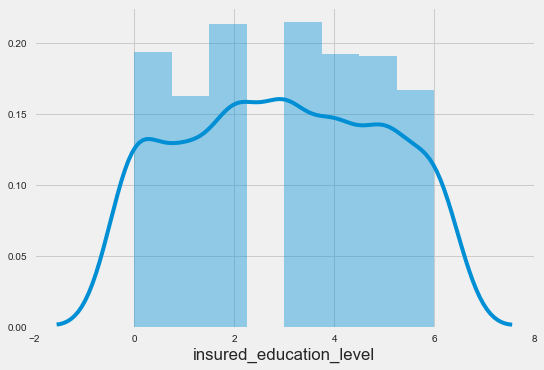

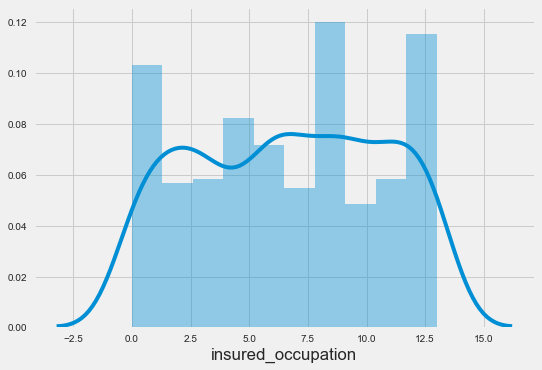

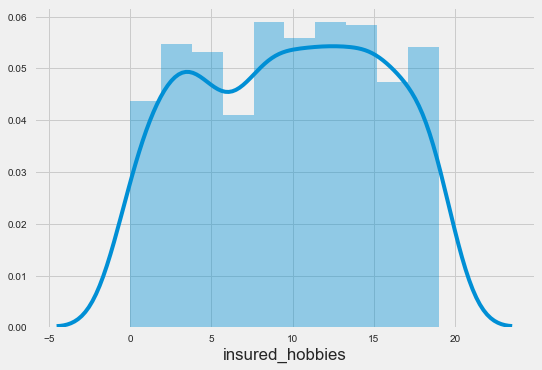

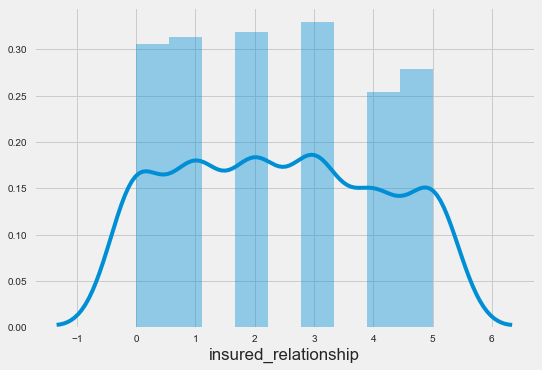

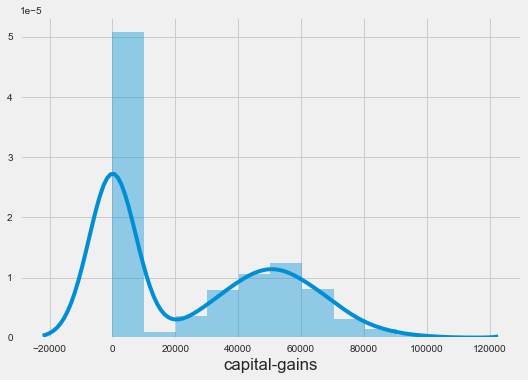

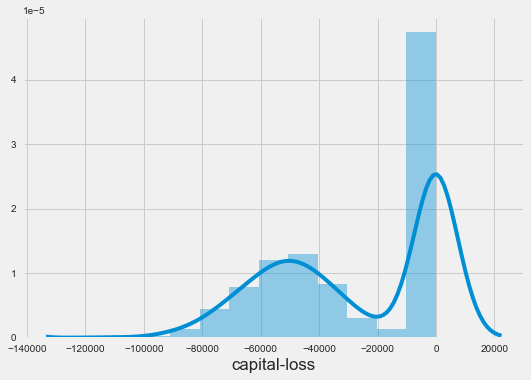

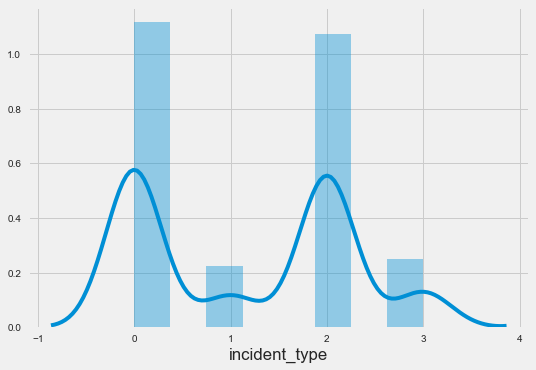

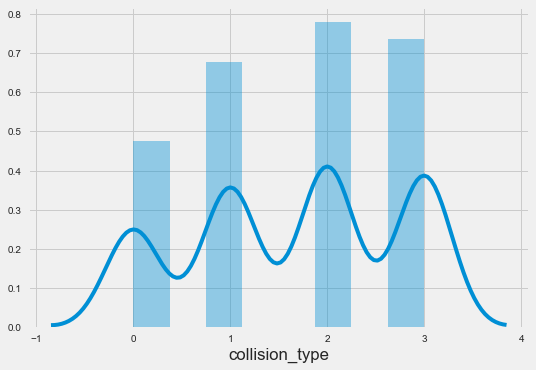

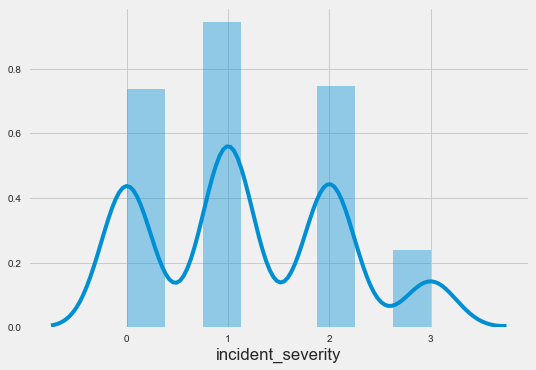

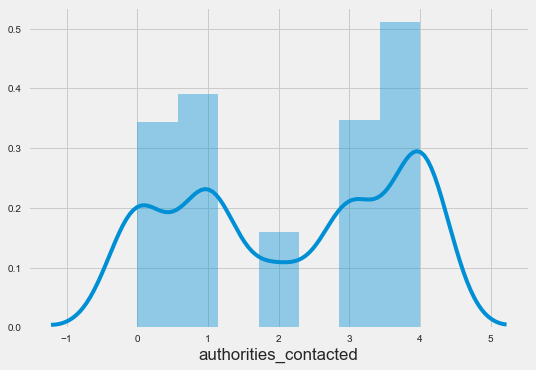

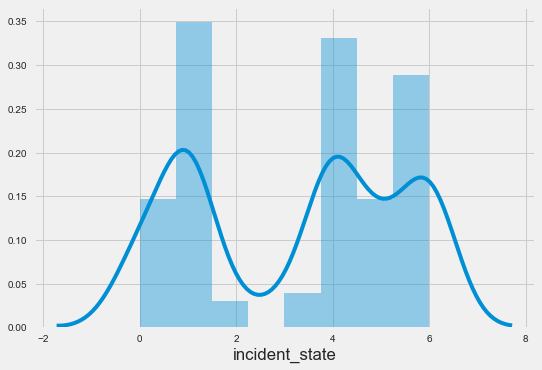

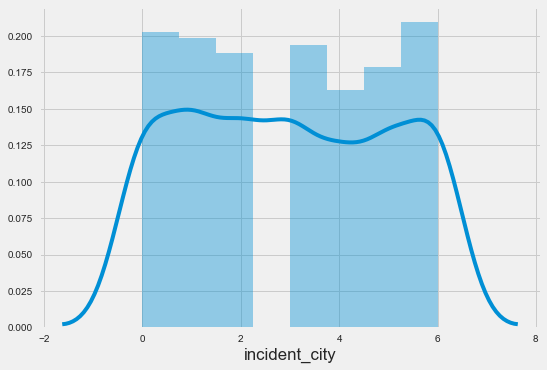

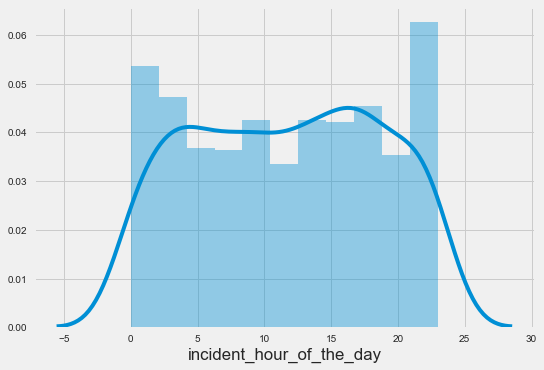

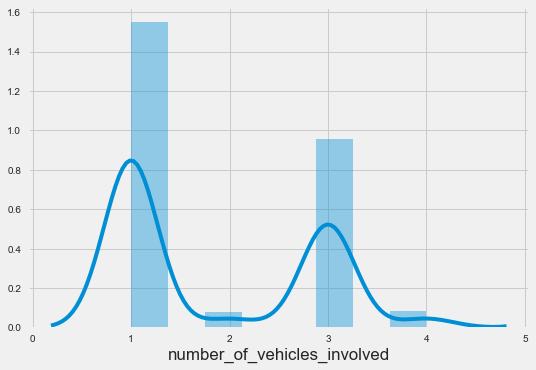

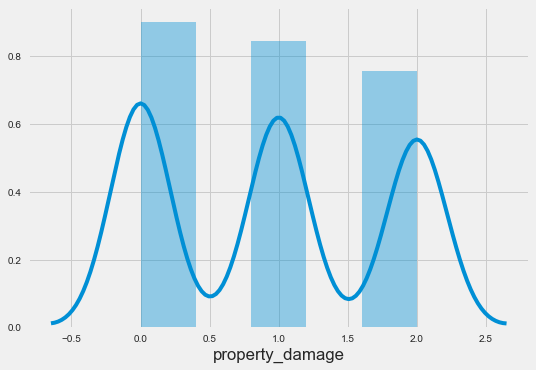

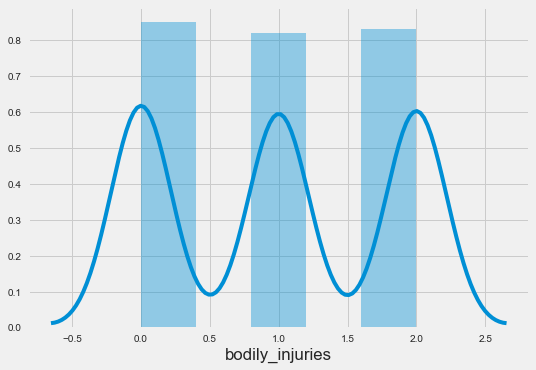

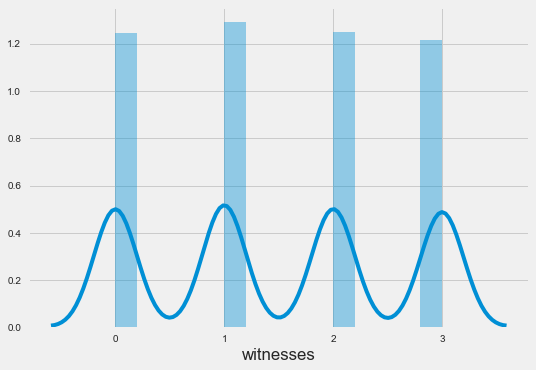

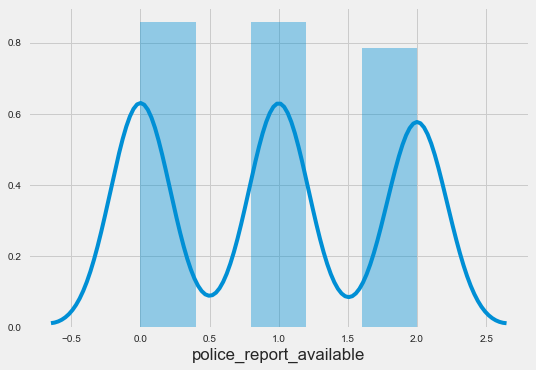

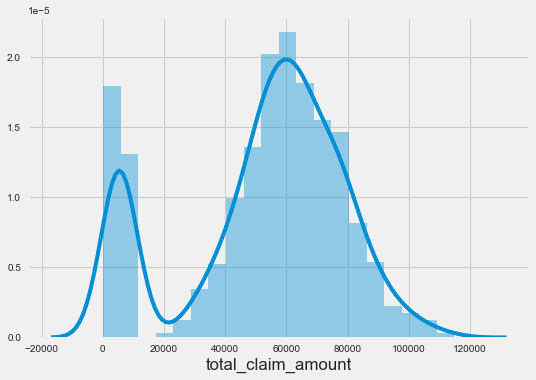

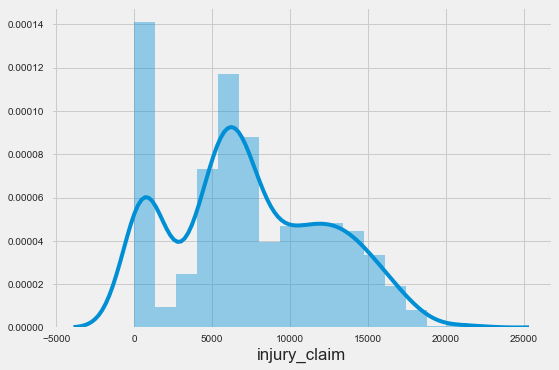

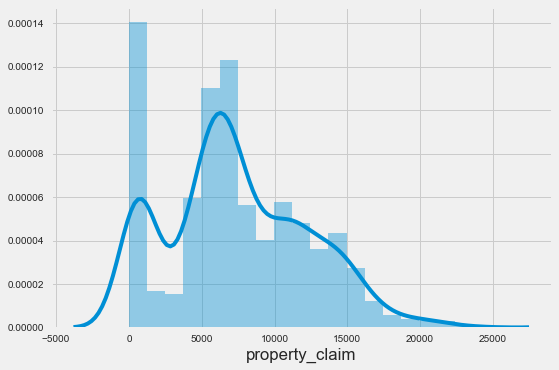

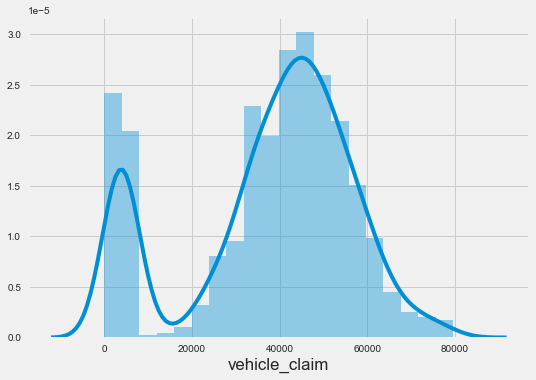

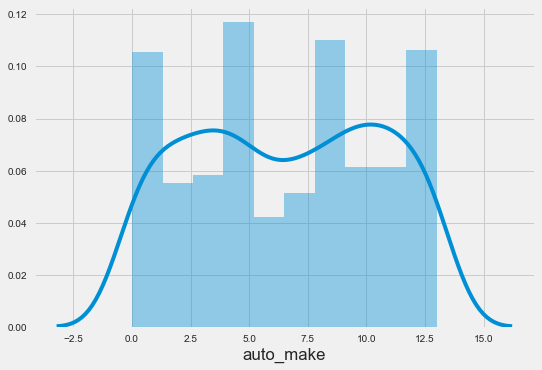

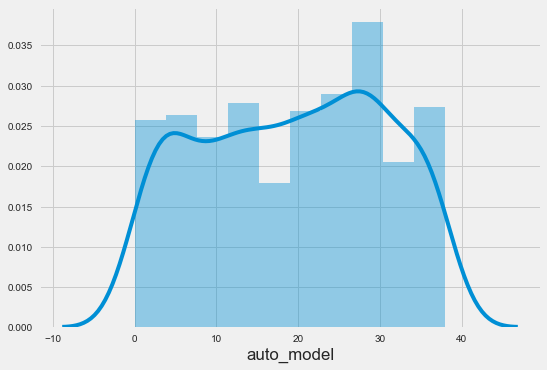

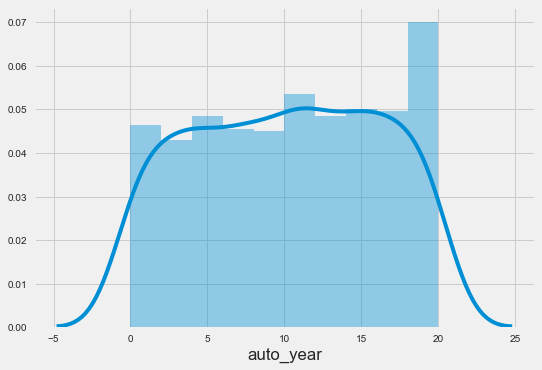

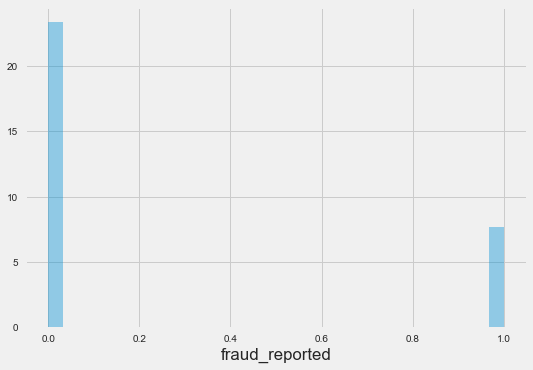

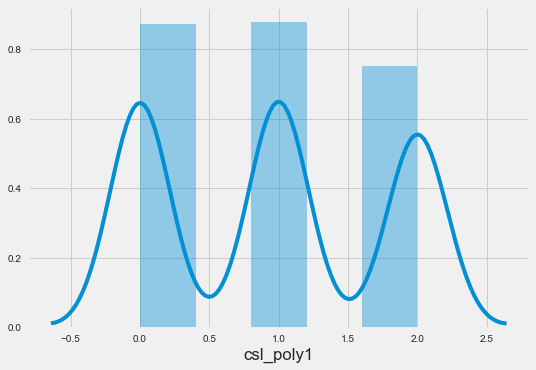

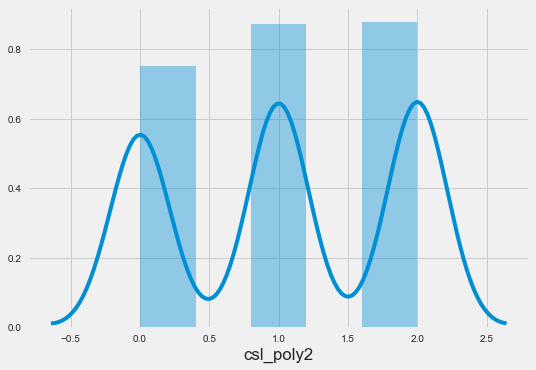

In [188]:
for i in df.columns:
    plt.figure()
    sb.distplot(df[i])

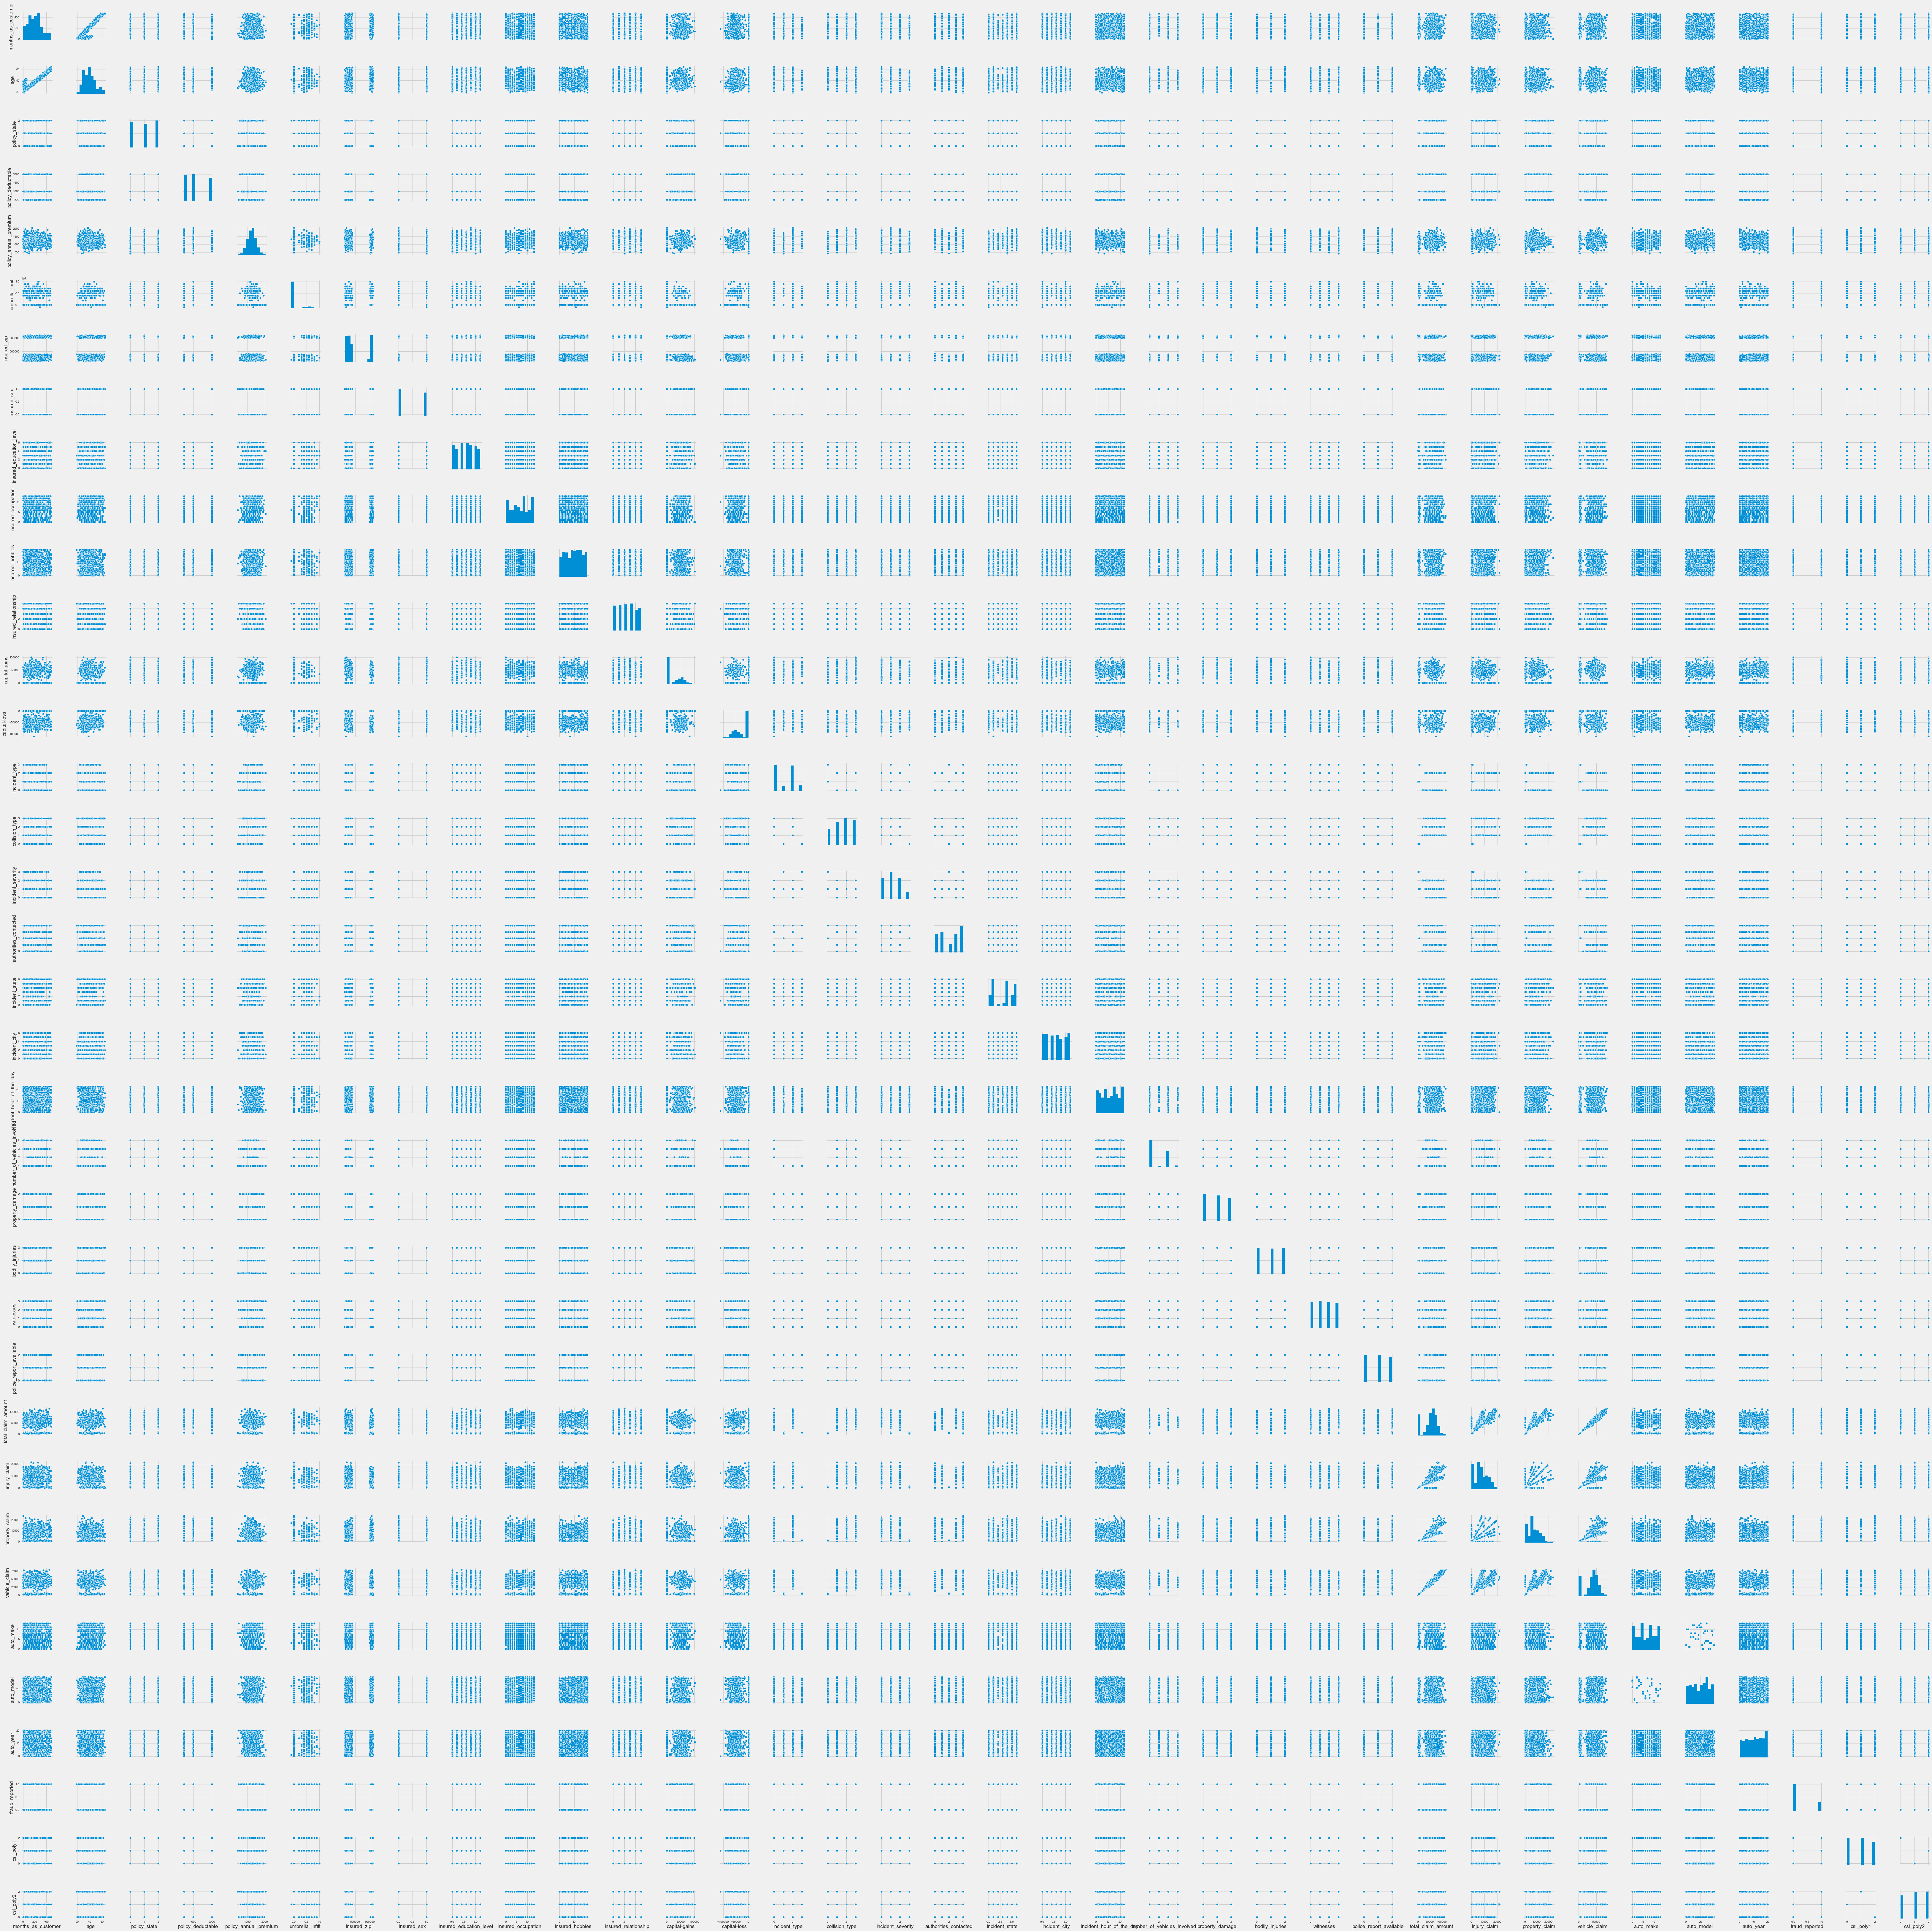

In [189]:
sb.pairplot(df)

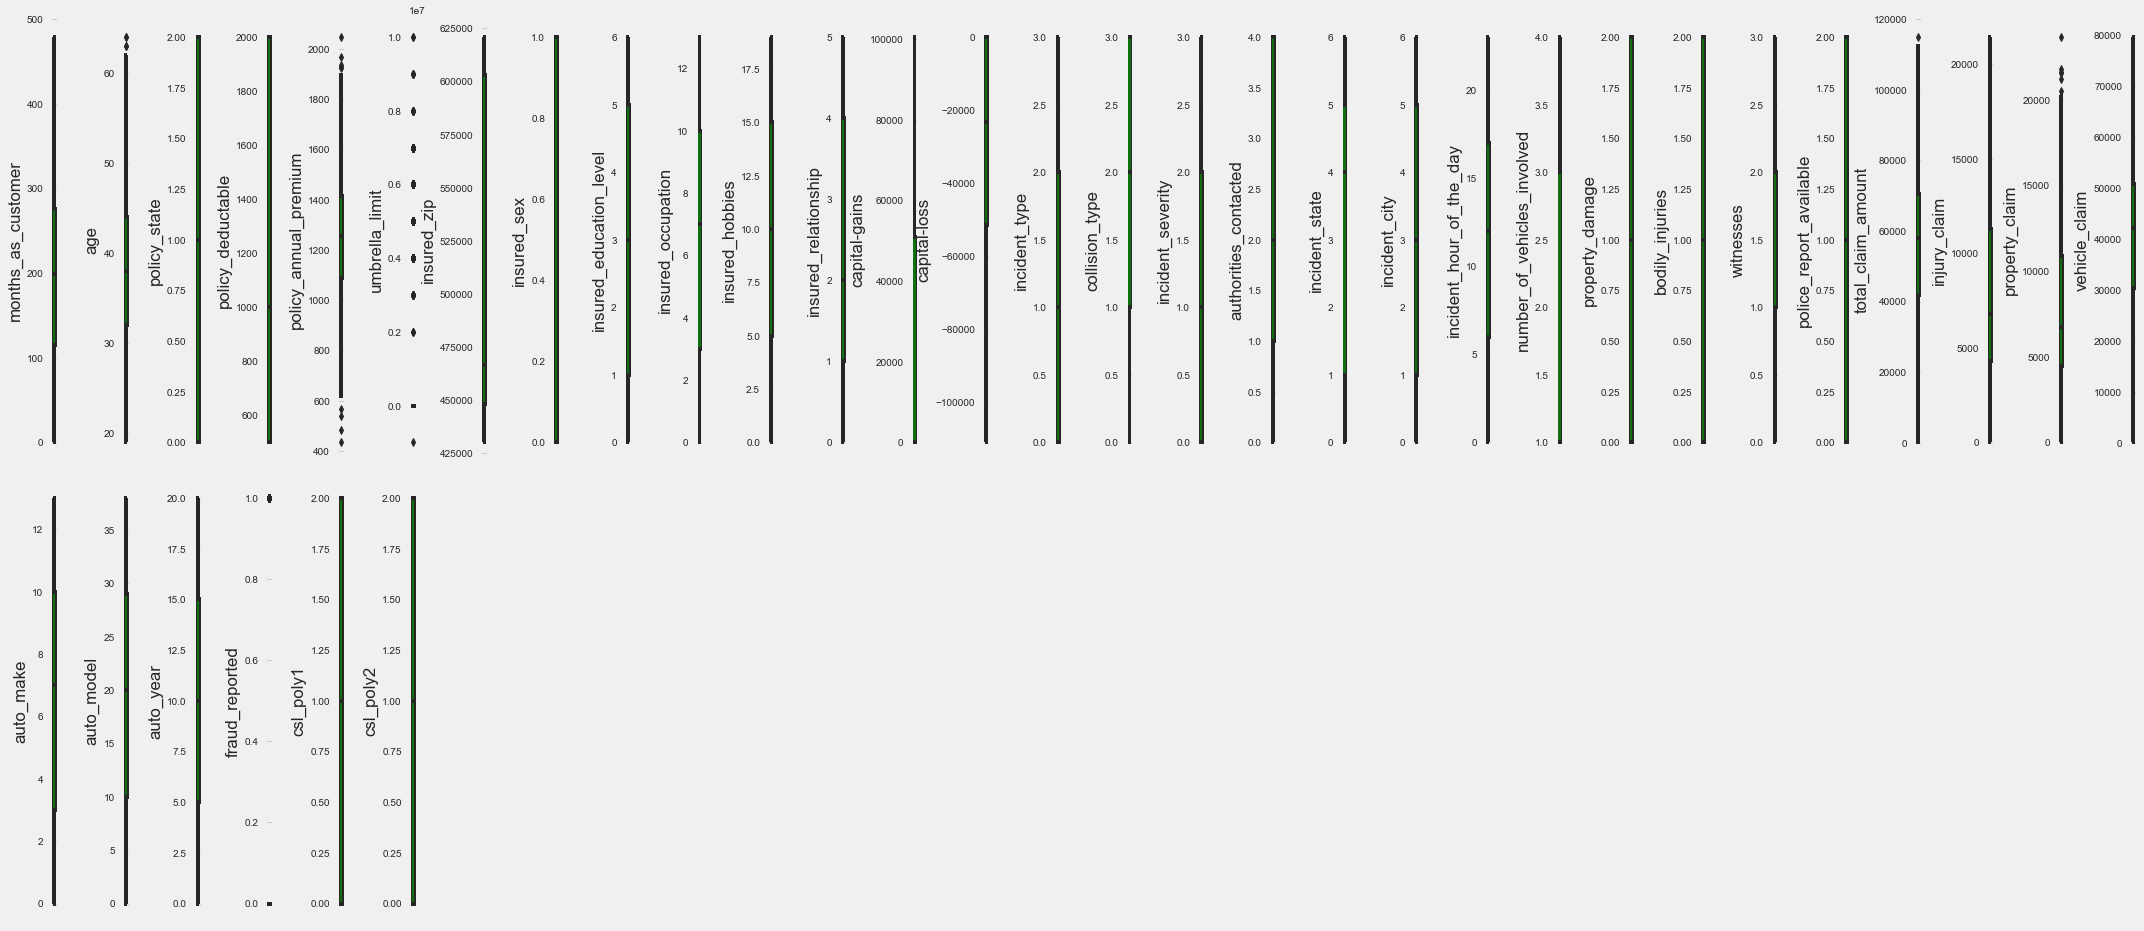

In [191]:
collist = df.columns
ncol = 30
nrows = 14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sb.boxplot(df[collist[i]],color = 'green',orient='v')
    plt.tight_layout()

we can say that there are few columns have correlation

We will split out dataset

In [192]:
x=df.drop(columns=['fraud_reported'])
y=df[['fraud_reported']]

In [193]:
x.shape

(1000, 35)

In [194]:
y.shape

(1000, 1)

In [195]:
y.head()

fraud_reported
0               1
1               1
2               0
3               1
4               0

In [196]:
x.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48           2.0               1000   
1                 228   42           1.0               2000   
2                 134   29           2.0               2000   
3                 256   41           0.0               2000   
4                 228   44           0.0               1000   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1406.91               0       466132          1.0   
1                1197.22         5000000       468176          1.0   
2                1413.14         5000000       430632          0.0   
3                1415.74         6000000       608117          0.0   
4                1583.91         6000000       610706          1.0   

   insured_education_level  insured_occupation  ...  police_report_available  \
0                      4.0                 2.0  ...                        2   
1                      4.0                 6.0  ...                        0   
2                      6.0                11.0  ...                        1   
3                      6.0                 1.0  ...                        1   
4                      0.0                11.0  ...                        1   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080       10.0   
1                5070           780             780           3510        8.0   
2               34650          7700            3850          23100        4.0   
3               63400          6340            6340          50720        3.0   
4                6500          1300             650           4550        0.0   

   auto_model  auto_year  csl_poly1  csl_poly2  
0         1.0          9        1.0        2.0  
1        12.0         12        1.0        2.0  
2        30.0         12        0.0        1.0  
3        34.0         19        1.0        2.0  
4        31.0         14        2.0        0.0  

[5 rows x 35 columns]

In [199]:
maxAccu=0
maxRS=0
for i in range (1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predf=LR.predict(x_test)
    accu=accuracy_score(y_test,predf)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
    
print("Best Accu is:",maxAccu,"on RS:",maxRS)

Best Accu is: 0.8409090909090909 on RS: 488


In [200]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=488)

In [201]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy_score:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.8409090909090909
[[182   0]
 [ 35   3]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       182
           1       1.00      0.08      0.15        38

    accuracy                           0.84       220
   macro avg       0.92      0.54      0.53       220
weighted avg       0.87      0.84      0.78       220



In [202]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

accuracy_score:
0.6545454545454545
[[133  49]
 [ 27  11]]
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       182
           1       0.18      0.29      0.22        38

    accuracy                           0.65       220
   macro avg       0.51      0.51      0.50       220
weighted avg       0.72      0.65      0.68       220



In [203]:
sv=SVC()
sv.fit(x_train,y_train)
predv=sv.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,predv))
print(confusion_matrix(y_test,predv))
print(classification_report(y_test,predv))

accuracy_score:
0.8272727272727273
[[182   0]
 [ 38   0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       182
           1       0.00      0.00      0.00        38

    accuracy                           0.83       220
   macro avg       0.41      0.50      0.45       220
weighted avg       0.68      0.83      0.75       220



In [204]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predr=rf.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,predr))
print(confusion_matrix(y_test,predr))
print(classification_report(y_test,predr))

accuracy_score:
0.8272727272727273
[[167  15]
 [ 23  15]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       182
           1       0.50      0.39      0.44        38

    accuracy                           0.83       220
   macro avg       0.69      0.66      0.67       220
weighted avg       0.81      0.83      0.82       220



In [205]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
preda=ad.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,preda))
print(confusion_matrix(y_test,preda))
print(classification_report(y_test,preda))

accuracy_score:
0.8136363636363636
[[158  24]
 [ 17  21]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       182
           1       0.47      0.55      0.51        38

    accuracy                           0.81       220
   macro avg       0.68      0.71      0.70       220
weighted avg       0.83      0.81      0.82       220



In [206]:
from sklearn.tree import DecisionTreeClassifier

In [207]:
dt_gini=DecisionTreeClassifier(criterion='entropy')
dt_gini.fit(x_train,y_train)
preddt=dt_gini.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt)) 

accuracy_score:
0.8136363636363636
[[157  25]
 [ 16  22]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       182
           1       0.47      0.58      0.52        38

    accuracy                           0.81       220
   macro avg       0.69      0.72      0.70       220
weighted avg       0.83      0.81      0.82       220



In [208]:
model=[rf,gnb,sv,ad,lg,dt_gini]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy_score:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())

accuracy_score:
0.8363636363636363
[[166  16]
 [ 20  18]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       182
           1       0.53      0.47      0.50        38

    accuracy                           0.84       220
   macro avg       0.71      0.69      0.70       220
weighted avg       0.83      0.84      0.83       220

[0.79  0.765 0.755 0.76  0.775]
0.769
accuracy_score:
0.6545454545454545
[[133  49]
 [ 27  11]]
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       182
           1       0.18      0.29      0.22        38

    accuracy                           0.65       220
   macro avg       0.51      0.51      0.50       220
weighted avg       0.72      0.65      0.68       220

[0.735 0.645 0.525 0.73  0.72 ]
0.6709999999999999
accuracy_score:
0.8272727272727273
[[182   0]
 [ 38   0]]
              precision    recall  f1-score   support

           0       0.83     

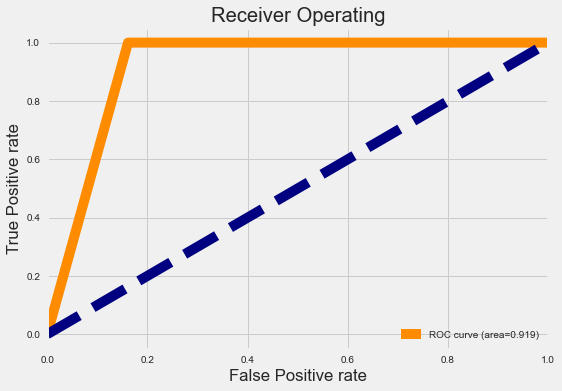

In [211]:
from sklearn.metrics import roc_curve,auc
fpr,trp,thresholds =  roc_curve(pred,y_test)
roc_auc = auc(fpr,trp)

plt.figure()
plt.plot(fpr,trp,color='darkorange',lw=10,label='ROC curve (area=%0.3f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.xlim([0.0,1.0])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating')
plt.legend(loc='lower right')
plt.show()